In [1]:
print('SLEEP DIARY')

SLEEP DIARY


In [2]:
print('Inserire il nome del file excel (.xlsx) contenente i dati:')
n=input()

Inserire il nome del file excel (.xlsx) contenente i dati:
Sleep dataset 2020.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import datetime
from datetime import datetime
dati=pd.read_excel(n)
dati.drop(0,inplace=True)
dati.head()

,Data,Ieri ha fatto un sonnellino di durata (minuti totali)?,A che ora è andato a letto ieri sera?,A che ora ha spento la luce per dormire?,"Dallo spegnimento della luce, in quanto tempo si è addormentato?",Orario previsto del risveglio questa mattina?,Qual è stato l'orario del risveglio finale questa mattina?,A che ora si è alzato dal letto?,Quante volte si è svegliato/a durante la notte? (0 se non si è svegliato/a),Quanti minuti in totale è rimasto/a sveglio/a nel corso della notte?,"Quanto è stato disturbato il suo sonno la notte scorsa? (1=per niente, 10=moltissimo)","Qualità del sonno la scorsa notte (1=molto scarso, 10=molto buono)","Livello di affaticamento di ieri (1=niente, 10=estremamente stancante)","Livello di sonnolenza di ieri (1=per niente, 10=estremamente sonnolento)",(polar)\nDaily activity goal,(polar)\nActual sleep,(polar)\nSleep continuity
1,2020-01-01 00:00:00,90,01:05:00,01:08:00,5,08:30:00,08:12:00,08:12:00,4,20,6,5,4,2,0.73,0.90,1.6
2,2020-01-02 00:00:00,0,23:02:00,23:51:00,5,07:30:00,07:30:00,07:30:00,0,0,1,7,2,1,0.90,0.96,4.8
3,2020-01-03 00:00:00,0,00:28:00,00:45:00,4,07:00:00,07:50:00,07:55:00,2,2,1,7,3,2,0.81,0.93,2.7
4,2020-01-04 00:00:00,0,22:55:00,00:03:00,10,06:00:00,06:00:00,06:00:00,0,0,1,7,6,1,1.99,0.93,2.8
5,2020-01-05 00:00:00,0,23:00:00,23:29:00,4,07:00:00,07:00:00,07:00:00,3,15,5,5,6,3,0.96,0.93,2.6


In [4]:
data_mix=np.array(dati.iloc[:,0])
data=np.array(data_mix)
for i in range(0,dati.shape[0],1):
    if(type(data_mix[i])==datetime):
        data[i]=data_mix[i].date()
    elif(type(data_mix[i])==str):
        data[i]=datetime.strptime(data_mix[i],"%d/%m/%y")
        data[i]=data[i].date()

In [5]:
#array contenente i giorni mensili
j=1
giorni_mensili=np.array(range(0,12,1))
for i in range(0,12,1):
    giorni_mensili[i]=0
for i in range(0,dati.shape[0],1):
    if(data[i].month==j):
        giorni_mensili[j-1]=int(giorni_mensili[j-1]+1)
    if(data[i].month!=j):
        j=j+1
        giorni_mensili[j-1]=int(giorni_mensili[j-1]+1)
mesi=['January','February','March','April','May','June','July','August','September','October','November','December']

In [6]:
#ore di sonno
import datetime
h_spenta=np.array(dati.iloc[:,3])
min_addormentamento=np.array(dati.iloc[:,4])
orario_addormentamento=np.array(h_spenta)
for i in range(0,dati.shape[0],1):
    if(min_addormentamento[i]+h_spenta[i].minute<60):
        orario_addormentamento[i]=orario_addormentamento[i].replace(minute=h_spenta[i].minute+min_addormentamento[i])
    elif(min_addormentamento[i]+h_spenta[i].minute>=60 and h_spenta[i].hour+((min_addormentamento[i]+h_spenta[i].minute)//60)<24):
        orario_addormentamento[i]=orario_addormentamento[i].replace(hour=h_spenta[i].hour+((min_addormentamento[i]+h_spenta[i].minute)//60),minute=(min_addormentamento[i]+h_spenta[i].minute)%60)
    elif(min_addormentamento[i]+h_spenta[i].minute>=60 and h_spenta[i].hour+((min_addormentamento[i]+h_spenta[i].minute)//60)>=24):
        orario_addormentamento[i]=orario_addormentamento[i].replace(hour=0,minute=(min_addormentamento[i]+h_spenta[i].minute)%60)

datetime_addormentamento=np.array(orario_addormentamento)  
for i in range(0,dati.shape[0],1):
    if (orario_addormentamento[i].hour<=12):
        data2=datetime.timedelta(days=1)+data[i]
        datetime_addormentamento[i]=datetime.datetime.combine(data2,orario_addormentamento[i])
    elif(orario_addormentamento[i].hour>12):
        datetime_addormentamento[i]=datetime.datetime.combine(data[i],orario_addormentamento[i])

ora_risveglio=np.array(dati.iloc[:,6])
datetime_risveglio=np.array(dati.iloc[:,6])
for i in range(0,dati.shape[0],1):
    data2=datetime.timedelta(days=1)+data[i]
    datetime_risveglio[i]=datetime.datetime.combine(data2,ora_risveglio[i])
    

ore_sonno=datetime_risveglio-datetime_addormentamento

for i in range(0,dati.shape[0],1):
    ore_sonno[i]=str(ore_sonno[i])
    ore_sonno[i]=datetime.datetime.strptime(ore_sonno[i],"%H:%M:%S")
    ore_sonno[i]=ore_sonno[i].time()
    #print(ore_sonno[i])
min_sonnellino=np.array(dati.iloc[:,1])
min_sveglio=np.array(dati.iloc[:,9])
diff=min_sonnellino-min_sveglio
for i in range(0,dati.shape[0],1):
    if(diff[i]+ore_sonno[i].minute<60 and diff[i]+ore_sonno[i].minute>0):
        ore_sonno[i]=ore_sonno[i].replace(minute=ore_sonno[i].minute+diff[i])
    elif(diff[i]+ore_sonno[i].minute<0 and ore_sonno[i].hour-((diff[i]+ore_sonno[i].minute)//60)>0):
        ore_sonno[i]=ore_sonno[i].replace(hour=ore_sonno[i].hour-((diff[i]+ore_sonno[i].minute)//60),minute=((diff[i]+ore_sonno[i].minute)%60))
    elif(diff[i]+ore_sonno[i].minute<0 and ore_sonno[i].hour-((diff[i]+ore_sonno[i].minute)//60)<0):
        ore_sonno[i]=ore_sonno[i].replace(hour=0,minute=0)
    elif(diff[i]+ore_sonno[i].minute>=60):
        ore_sonno[i]=ore_sonno[i].replace(hour=ore_sonno[i].hour+((diff[i]+ore_sonno[i].minute)//60),minute=(diff[i]+ore_sonno[i].minute)%60)
    #print(ore_sonno[i])

In [7]:
format_ore="%H.%M"
for i in range(0,dati.shape[0],1):
    ore_sonno[i]=ore_sonno[i].strftime(format_ore)
    ore_sonno[i]=float(ore_sonno[i])

In [8]:
#ore di sonno medie mensili
ore_sonno_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    ore_sonno_mensile[i]=np.mean(ore_sonno[j:gg])
    j=j+giorni_mensili[i]


In [9]:
#media tempo trascorso a letto
alzato=np.array(dati.iloc[:,7])
sdraiato=np.array(dati.iloc[:,2])

datetime_sdraiato=np.array(sdraiato)  
for i in range(0,dati.shape[0],1):
    if (sdraiato[i].hour<=12):
        data2=datetime.timedelta(days=1)+data[i]
        datetime_sdraiato[i]=datetime.datetime.combine(data2,sdraiato[i])
    elif(sdraiato[i].hour>12):
        datetime_sdraiato[i]=datetime.datetime.combine(data[i],sdraiato[i])

datetime_alzato=np.array(dati.iloc[:,6])
for i in range(0,dati.shape[0],1):
    data2=datetime.timedelta(days=1)+data[i]
    datetime_alzato[i]=datetime.datetime.combine(data2,alzato[i])
    

t_l=datetime_alzato-datetime_sdraiato
for i in range(0,dati.shape[0],1):
    t_l[i]=str(t_l[i])
    t_l[i]=datetime.datetime.strptime(t_l[i],"%H:%M:%S")
    t_l[i]=t_l[i].time()
    t_l[i]=t_l[i].strftime(format_ore)
    t_l[i]=float(t_l[i])
    
t_l_mensile=np.zeros(12)
t_l_annuale=np.mean(t_l)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    t_l_mensile[i]=np.mean(t_l[j:gg])
    j=j+giorni_mensili[i]


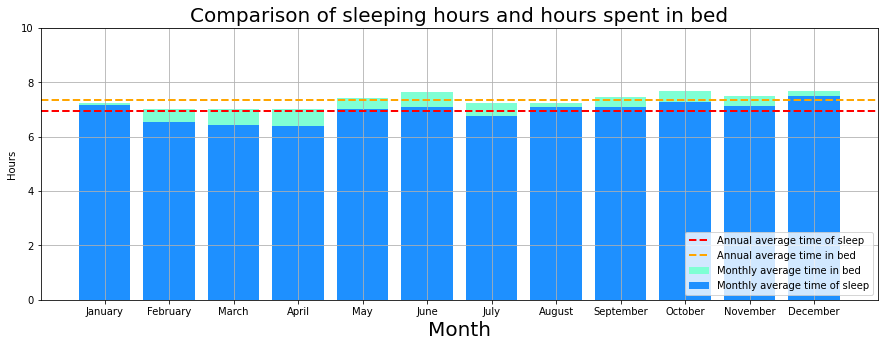

In [10]:
ore_sonno_annuale=np.mean(ore_sonno)
x=range(0,12,1)
plt.figure(figsize=(15,5))
plt.grid()
plt.bar
plt.bar(x,t_l_mensile,color='aquamarine',label='Monthly average time in bed')
plt.bar(x,ore_sonno_mensile,color='dodgerblue',label='Monthly average time of sleep')
plt.axhline(y=ore_sonno_annuale,linestyle='--',label='Annual average time of sleep',color='red',linewidth=2)
plt.axhline(y=t_l_annuale,linestyle='--',label='Annual average time in bed',color='orange',linewidth=2)
plt.xticks(x,mesi)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Hours')
plt.ylim(0,10)
plt.title('Comparison of sleeping hours and hours spent in bed',fontsize=20)
plt.legend(loc='lower right')

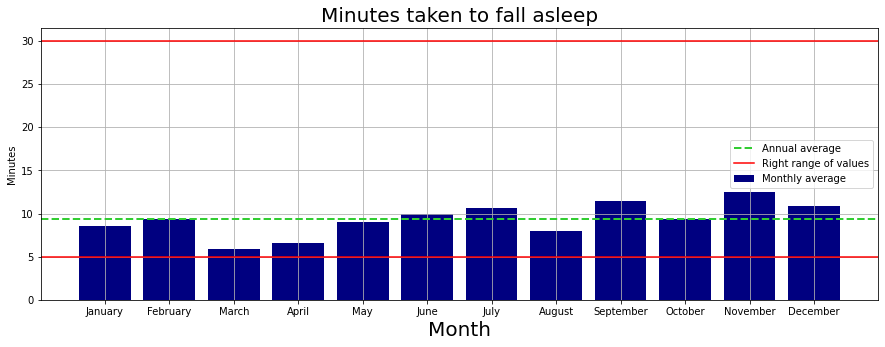

In [11]:
#minuti impiegati per addormentarsi
min_add=np.array(dati.iloc[:,4])
min_add_annuale=np.mean(min_add)
min_add_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    min_add_mensile[i]=np.mean(min_add[j:gg])
    j=j+giorni_mensili[i]

plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,min_add_mensile,color='navy',label='Monthly average')
plt.axhline(y=min_add_annuale,linestyle='--',label='Annual average',color='limegreen',linewidth=2)
plt.axhline(y=30, color='red',label='Right range of values')
plt.axhline(y=5, color='red')
plt.title("Minutes taken to fall asleep",fontsize=20)
plt.xticks(x,mesi)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Minutes')
plt.legend(loc='right')

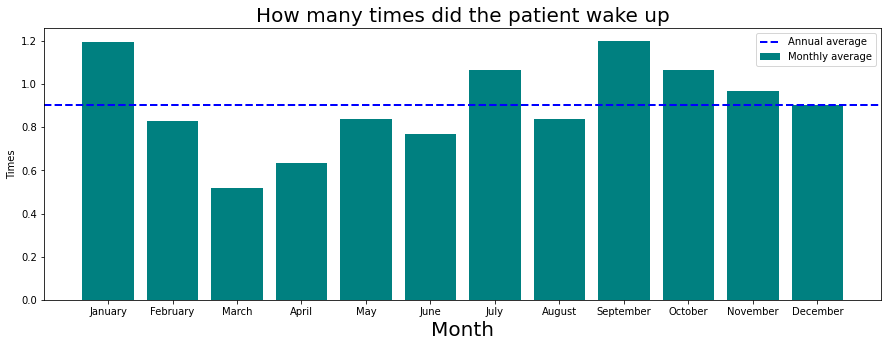

In [12]:
#numero di volte che si è svegliato durante la notte
t_w=np.array(dati.iloc[:,8])
t_w_annuale=np.mean(t_w)
t_w_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    t_w_mensile[i]=np.mean(t_w[j:gg])
    j=j+giorni_mensili[i]

plt.figure(figsize=(15,5))
plt.bar(x,t_w_mensile,color='teal', label='Monthly average')
plt.title("How many times did the patient wake up",fontsize=20)

plt.axhline(y=t_w_annuale,linestyle='--',label='Annual average',color='blue',linewidth=2)
plt.xticks(x,mesi)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Times')
plt.legend()

In [13]:
actual_sleep=np.array(dati.iloc[:,15])
actual_sleep_bool=np.isnan(actual_sleep)
j=0
non_misurati_as=0
for i in range(0,dati.shape[0],1):
    if(actual_sleep_bool[i]==True):
        non_misurati_as=non_misurati_as+1
        
nan_as=np.array(range(0,non_misurati_as,1))
for i in range(0,dati.shape[0],1):
    if(actual_sleep_bool[i]==True):
        nan_as[j]=i
        j=j+1
actual_sleep_new=np.delete(actual_sleep,nan_as)
data_new_as=np.delete(data,nan_as)


j=1
giorni_mensili_as=np.array(range(0,12,1))
for i in range(0,12,1):
    giorni_mensili_as[i]=0
for i in range(0,len(data_new_as),1):
    if(data_new_as[i].month==j):
        giorni_mensili_as[j-1]=giorni_mensili_as[j-1]+1
    if(data_new_as[i].month!=j):
        j=j+1
        giorni_mensili_as[j-1]=giorni_mensili_as[j-1]+1

The polar device did not measure for 42 days


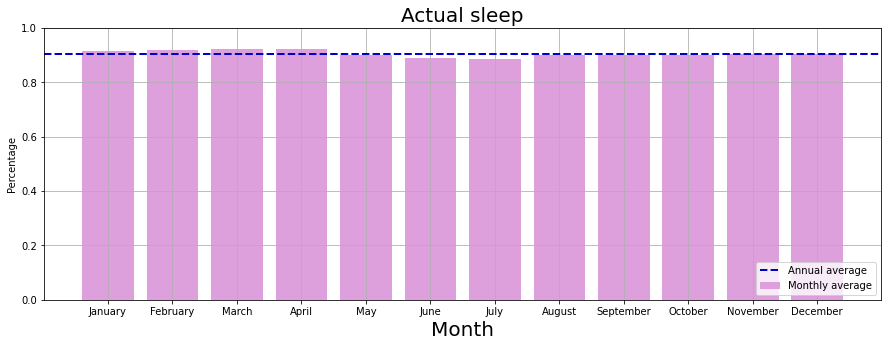

In [14]:
actual_sleep_annuale=np.mean(actual_sleep_new)
actual_sleep_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili_as[i]+j
    actual_sleep_mensile[i]=np.mean(actual_sleep_new[j:gg])
    j=j+giorni_mensili_as[i]

print('The polar device did not measure for',non_misurati_as,'days')
plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,actual_sleep_mensile,color='plum',label='Monthly average')
plt.axhline(y=actual_sleep_annuale,linestyle='--',label='Annual average',color='mediumblue',linewidth=2)
plt.xticks(x,mesi)
plt.title("Actual sleep",fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Percentage')
plt.ylim(0,1)
plt.legend(loc='lower right')

In [15]:
sleep_continuity=np.array(dati.iloc[:,16])
sleep_continuity_bool=np.isnan(sleep_continuity)
j=0
non_misurati_sc=0
for i in range(0,dati.shape[0],1):
    if(sleep_continuity_bool[i]==True):
        non_misurati_sc=non_misurati_sc+1
        
nan_sc=np.array(range(0,non_misurati_sc,1))
for i in range(0,dati.shape[0],1):
    if(sleep_continuity_bool[i]==True):
        nan_sc[j]=i
        j=j+1
sleep_continuity_new=np.delete(sleep_continuity,nan_sc)
data_new_sc=np.delete(data,nan_sc)


j=1
giorni_mensili_sc=np.array(range(0,12,1))
for i in range(0,12,1):
    giorni_mensili_sc[i]=0
for i in range(0,len(data_new_sc),1):
    if(data_new_sc[i].month==j):
        giorni_mensili_sc[j-1]=giorni_mensili_sc[j-1]+1
    if(data_new_sc[i].month!=j):
        j=j+1
        giorni_mensili_sc[j-1]=giorni_mensili_sc[j-1]+1

The polar device did not measure for 42 days


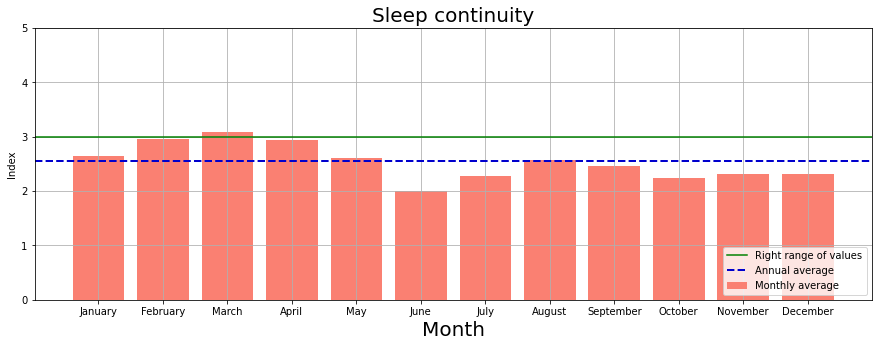

In [16]:
sleep_continuity_annuale=np.mean(sleep_continuity_new)
sleep_continuity_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili_sc[i]+j
    sleep_continuity_mensile[i]=np.mean(sleep_continuity_new[j:gg])
    j=j+giorni_mensili_sc[i]

print('The polar device did not measure for',non_misurati_sc,'days')

plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,sleep_continuity_mensile,color='salmon',label='Monthly average')
plt.axhline(y=3, color='green',label='Right range of values')
plt.axhline(y=sleep_continuity_annuale,linestyle='--',label='Annual average',color='mediumblue',linewidth=2)
plt.title("Sleep continuity",fontsize=20)
plt.xticks(x,mesi)
plt.ylim(0,5)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Index')
plt.legend(loc='lower right')

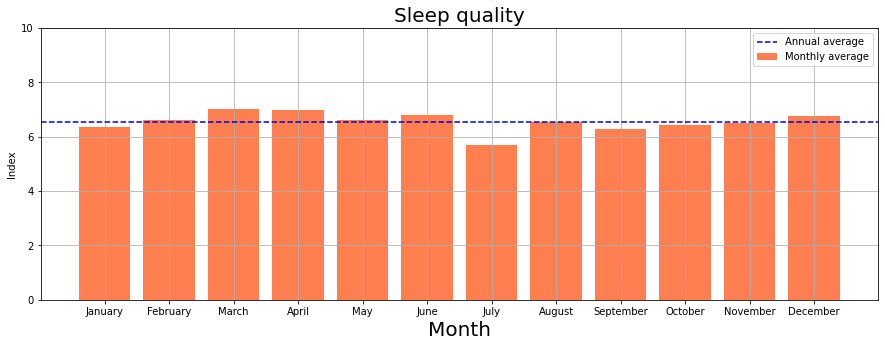

In [17]:
q_s=np.array(dati.iloc[:,11])
q_s_annuale=np.mean(q_s)
q_s_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    q_s_mensile[i]=np.mean(q_s[j:gg])
    j=j+giorni_mensili[i]

plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,q_s_mensile,color='coral',label='Monthly average')
plt.axhline(y=q_s_annuale,linestyle='--',label='Annual average',color='mediumblue')
plt.title("Sleep quality",fontsize=20)
plt.xticks(x,mesi)
plt.ylim(0,10)
plt.ylabel('Index')
plt.xlabel('Month',fontsize=20)
plt.legend()

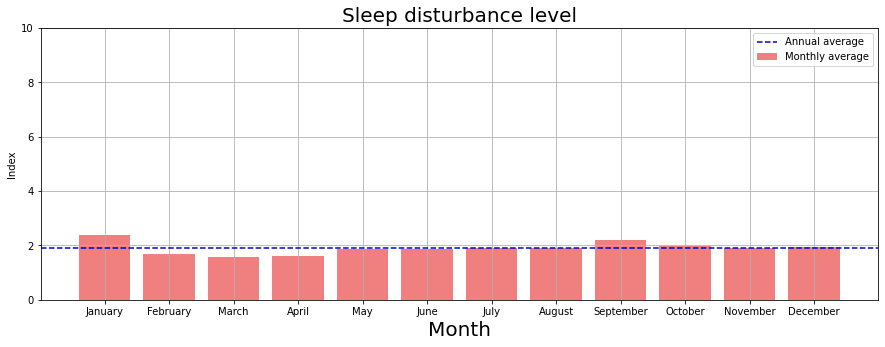

In [18]:
d_s=np.array(dati.iloc[:,10])
d_s_annuale=np.mean(d_s)
d_s_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    d_s_mensile[i]=np.mean(d_s[j:gg])
    j=j+giorni_mensili[i]

plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,d_s_mensile,color='lightcoral',label='Monthly average')
plt.axhline(y=d_s_annuale,linestyle='--',label='Annual average',color='mediumblue')
plt.title("Sleep disturbance level",fontsize=20)
plt.xticks(x,mesi)
plt.ylim(0,10)
plt.ylabel('Index')
plt.xlabel('Month',fontsize=20)
plt.legend()

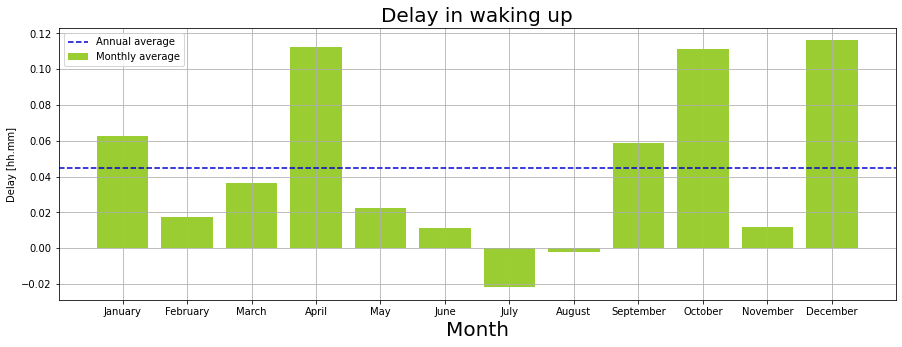

In [19]:
#ritardo nello svegliarsi
from datetime import datetime
risveglio_previsto=np.array(dati.iloc[:,5])
risveglio_effettivo=np.array(dati.iloc[:,6])
risveglio_p_dt=np.array(dati.iloc[:,5])
risveglio_e_dt=np.array(dati.iloc[:,6])
ritardo=np.array(dati.iloc[:,5])
for i in range(0,dati.shape[0],1):
    risveglio_p_dt[i]=datetime.combine(data[i],risveglio_previsto[i])
    risveglio_e_dt[i]=datetime.combine(data[i],risveglio_effettivo[i])
    if(risveglio_effettivo[i]>=risveglio_previsto[i]):
        ritardo[i]=risveglio_e_dt[i]-risveglio_p_dt[i]
        ritardo[i]=str(ritardo[i])
        ritardo[i]=datetime.strptime(ritardo[i],"%H:%M:%S")
        ritardo[i]=ritardo[i].time()
        ritardo[i]=ritardo[i].strftime(format_ore)
        ritardo[i]=float(ritardo[i])
    else:
        ritardo[i]=risveglio_p_dt[i]-risveglio_e_dt[i]
        ritardo[i]=str(ritardo[i])
        ritardo[i]=datetime.strptime(ritardo[i],"%H:%M:%S")
        ritardo[i]=ritardo[i].time()
        ritardo[i]=ritardo[i].strftime(format_ore)
        ritardo[i]=float(ritardo[i])
        ritardo[i]=-ritardo[i]

ritardo_annuale=np.mean(ritardo)
ritardo_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    ritardo_mensile[i]=np.mean(ritardo[j:gg])
    j=j+giorni_mensili[i]

plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,ritardo_mensile,color='yellowgreen',label='Monthly average')
plt.axhline(y=ritardo_annuale,linestyle='--',label='Annual average',color='mediumblue')
plt.title("Delay in waking up",fontsize=20)
plt.xticks(x,mesi)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Delay [hh.mm]')
plt.legend()

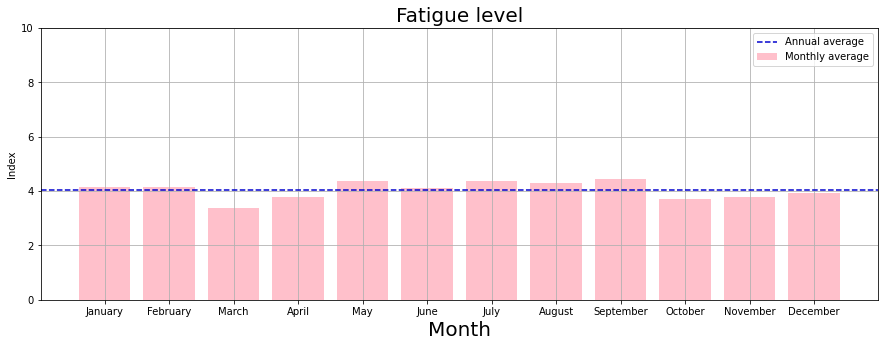

In [20]:
a=np.array(dati.iloc[:,12])
a_annuale=np.mean(a)
a_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    a_mensile[i]=np.mean(a[j:gg])
    j=j+giorni_mensili[i]

plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,a_mensile,color='pink',label='Monthly average')
plt.axhline(y=a_annuale,linestyle='--',label='Annual average',color='mediumblue')
plt.title("Fatigue level",fontsize=20)
plt.xticks(x,mesi)
plt.ylim(0,10)
plt.ylabel('Index')
plt.xlabel('Month',fontsize=20)
plt.legend()

In [21]:
activity_goal=np.array(dati.iloc[:,14])
activity_goal_bool=np.isnan(activity_goal)
j=0
non_misurati_ag=0
for i in range(0,dati.shape[0],1):
    if(activity_goal_bool[i]==True):
        non_misurati_ag=non_misurati_ag+1
        
nan_ag=np.array(range(0,non_misurati_ag,1))
for i in range(0,dati.shape[0],1):
    if(activity_goal_bool[i]==True):
        nan_ag[j]=i
        j=j+1
activity_goal_new=np.delete(activity_goal,nan_ag)
data_new_ag=np.delete(data,nan_ag)


j=1
giorni_mensili_ag=np.array(range(0,12,1))
for i in range(0,12,1):
    giorni_mensili_ag[i]=0
for i in range(0,len(data_new_ag),1):
    if(data_new_ag[i].month==j):
        giorni_mensili_ag[j-1]=giorni_mensili_ag[j-1]+1
    if(data_new_ag[i].month!=j):
        j=j+1
        giorni_mensili_ag[j-1]=giorni_mensili_ag[j-1]+1

The polar device did not measure for 21 days


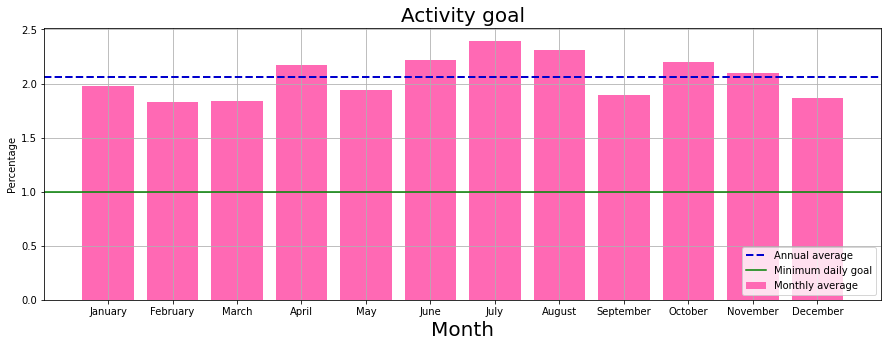

In [22]:
activity_goal_annuale=np.mean(activity_goal_new)
activity_goal_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili_ag[i]+j
    activity_goal_mensile[i]=np.mean(activity_goal_new[j:gg])
    j=j+giorni_mensili_ag[i]

print('The polar device did not measure for',non_misurati_ag,'days')
plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,activity_goal_mensile,color='hotpink',label='Monthly average')
plt.axhline(y=activity_goal_annuale,linestyle='--',label='Annual average',color='mediumblue',linewidth=2)
plt.xticks(x,mesi)
plt.axhline(y=1, color='green',label='Minimum daily goal')
plt.title("Activity goal",fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Percentage')
plt.legend(loc='lower right')

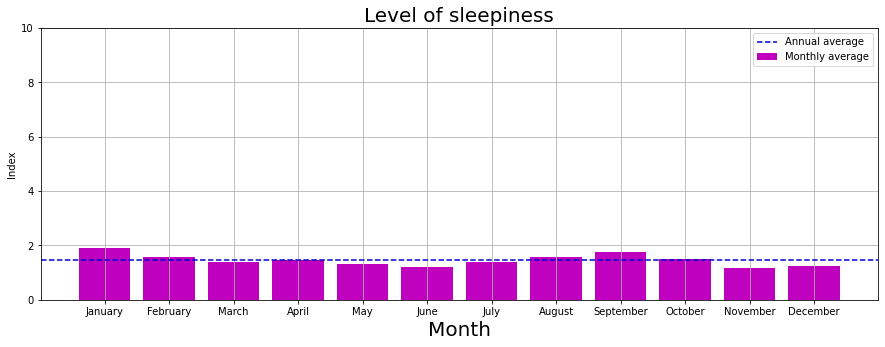

In [23]:
sonnolenza=np.array(dati.iloc[:,13])
sonnolenza_annuale=np.mean(sonnolenza)
sonnolenza_mensile=np.zeros(12)
j=0
for i in range(0,12,1):
    gg=giorni_mensili[i]+j
    sonnolenza_mensile[i]=np.mean(sonnolenza[j:gg])
    j=j+giorni_mensili[i]

plt.figure(figsize=(15,5))
plt.grid()
plt.bar(x,sonnolenza_mensile,color='m',label='Monthly average')
plt.axhline(y=sonnolenza_annuale,linestyle='--',label='Annual average',color='mediumblue')
plt.title("Level of sleepiness",fontsize=20)
plt.xticks(x,mesi)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Index')
plt.ylim(0,10)
plt.legend()